# Data Cleaning 
- Addressing **missing values, outliers, and inconsistencies**.
- This step ensures the data's quality before analysis. 
- Understand the **structure** and **quality** of the data through exploration and prepare it for further analysis. **Exploratory Data Analysis (EDA)** 

## 1.Forest Cover
- Annual Tree Cover Loss
- Treecover Loss
- Tree cover Extent


In [111]:
# importations
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

def readCSV(file_path):
    df = pd.read_csv(file_path)
    return df

def readXLS(file_path):
    df = pd.read_excel(file_path)
    return df

def describeData(df): 
    print("--------------------")
    print(" OVERVIEW OF DATA ")
    print("--------------------")
    print(df.head())
    print("--------------------")
    print(" DATA TYPES ")
    print("--------------------")
    print(df.dtypes)
    print("--------------------")
    print(" DATAFRAME SHAPE ")
    print("--------------------")
    print(df.shape)

def summaryOfData(df):
    print("Statistical Summary of data")
    print(df.describe())

#  Checking for Outliers and Null Values
    
def  checkNullValues(df):
    print("Null Values Present in Data")
    print(df.isna().sum() * 100 / len(df))


# checking for outliers based on box plot and Inter Quartile Range

def checkOutliersIQR(df):
    Q1 = np.percentile(df, 25, method='midpoint')
    Q3 = np.percentile(df, 75, method='midpoint')
    IQR = Q3 - Q1
    print(f"Inter Quartile Range: {IQR}")

    # Calculating Lower & Upper Bounds
    lowerBound = Q1 - 1.5*IQR
    upperBound = Q3 + 1.5*IQR 

    print(f"Lower Bound: {lowerBound}")
    print(f"Upper Bound: {upperBound}")


def checkOutliersBoxplot(df):
    sns.boxplot(df)

### Read Data (Forest Cover)

**NOTE**: Forest Cover
- **Tree cover** is defined as all vegetation taller than 5 meters in height as of 2000. The tree cover data set is a collaboration of the University of Maryland, Google, USGS, and NASA, and uses Landsat satellite images to map tree cover globally for the years 2000 and 2010 at 30-meter resolution. 
- Note that *“tree cover”* is the biophysical presence of trees and may take the form of natural forests or plantations existing over a range of canopy densities.

#### Focuses on the Annual Tree cover loss by dominant driver in Kenya

In [ ]:
forest_cover_loss = readCSV("data/Forest Cover/Annual tree cover loss by dominant driver in Kenya/treecover_loss__ha.csv") 
forest_cover_extent = readCSV("data/Forest Cover/Annual tree cover loss by dominant driver in Kenya/treecover_extent_2000__ha.csv")

### Overview of into the data

- Overview of Data using df.head()
- Checking Data types
- Checking the dimension of the data

In [ ]:
summaryOfData(forest_cover_loss)

Statistical Summary of data
       umd_tree_cover_loss__year  umd_tree_cover_loss__ha  \
count                 132.000000               132.000000   
mean                 2011.500000              2841.117428   
std                     6.368458              6032.652721   
min                  2001.000000                25.579869   
25%                  2006.000000               126.041695   
50%                  2011.500000               245.179269   
75%                  2017.000000               492.886238   
max                  2022.000000             24213.043111   

       gfw_gross_emissions_co2e_all_gases__Mg  
count                            1.320000e+02  
mean                             1.395906e+06  
std                              2.989859e+06  
min                              6.880135e+03  
25%                              5.074765e+04  
50%                              1.005047e+05  
75%                              2.871572e+05  
max                              1.211

In [ ]:
describeData(forest_cover_extent)

--------------------
 OVERVIEW OF DATA 
--------------------
   iso  umd_tree_cover_extent_2000__ha      area__ha
0  KEN                    3.319483e+06  5.859834e+07
--------------------
 DATA TYPES 
--------------------
iso                                object
umd_tree_cover_extent_2000__ha    float64
area__ha                          float64
dtype: object
--------------------
 DATAFRAME SHAPE 
--------------------
(1, 3)


### Statistical Summary of the Forest Cover Data

In [ ]:
describeData(forest_cover_loss)

--------------------
 OVERVIEW OF DATA 
--------------------
  tsc_tree_cover_loss_drivers__driver  umd_tree_cover_loss__year  \
0                             Unknown                       2012   
1                            Forestry                       2021   
2                Shifting agriculture                       2019   
3                            Forestry                       2020   
4                             Unknown                       2019   

   umd_tree_cover_loss__ha  gfw_gross_emissions_co2e_all_gases__Mg  
0               270.305210                            8.048608e+04  
1               103.917887                            9.014521e+04  
2             14614.369913                            6.670329e+06  
3               490.616006                            2.383159e+05  
4               114.893385                            4.442652e+04  
--------------------
 DATA TYPES 
--------------------
tsc_tree_cover_loss_drivers__driver        object
umd_tree_co

In [ ]:
summaryOfData(forest_cover_extent)

Statistical Summary of data
       umd_tree_cover_extent_2000__ha      area__ha
count                    1.000000e+00  1.000000e+00
mean                     3.319483e+06  5.859834e+07
std                               NaN           NaN
min                      3.319483e+06  5.859834e+07
25%                      3.319483e+06  5.859834e+07
50%                      3.319483e+06  5.859834e+07
75%                      3.319483e+06  5.859834e+07
max                      3.319483e+06  5.859834e+07


### Check For Null Values and Outliers

In [ ]:
# checking missing values 
checkNullValues(forest_cover_loss) 

Null Values Present in Data
tsc_tree_cover_loss_drivers__driver       0.0
umd_tree_cover_loss__year                 0.0
umd_tree_cover_loss__ha                   0.0
gfw_gross_emissions_co2e_all_gases__Mg    0.0
dtype: float64


In [ ]:
# checking missing values 
checkNullValues(forest_cover_extent)  

Null Values Present in Data
iso                               0.0
umd_tree_cover_extent_2000__ha    0.0
area__ha                          0.0
dtype: float64


### Checking for Outliers using IQR (Inter Quartile Range) and Box Plots for visualization

**Formulaes**
IQR = Quartile3 – Quartile1
upperBound = Q3 + 1.5*IQR
lowerBound = Q1 – 1.5*IQR


In [ ]:
# Checking for Outliers using IQR (Inter Quartile Range) 
checkOutliersIQR(forest_cover_loss['umd_tree_cover_loss__ha'])  

Inter Quartile Range: 370.0310606437092
Lower Bound: -429.92118090567
Upper Bound: 1050.2030616691668


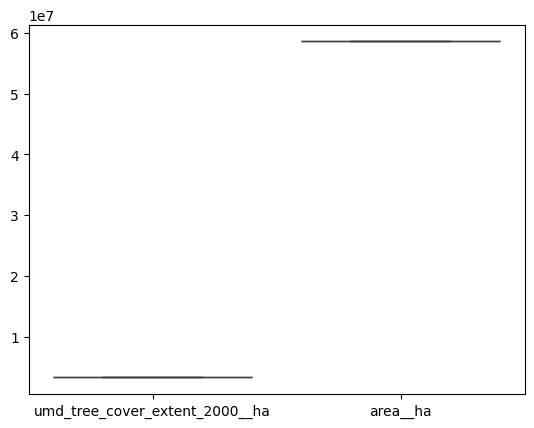

In [ ]:
# Checking for Outliers Using BoxPlot 
checkOutliersBoxplot(forest_cover_extent)

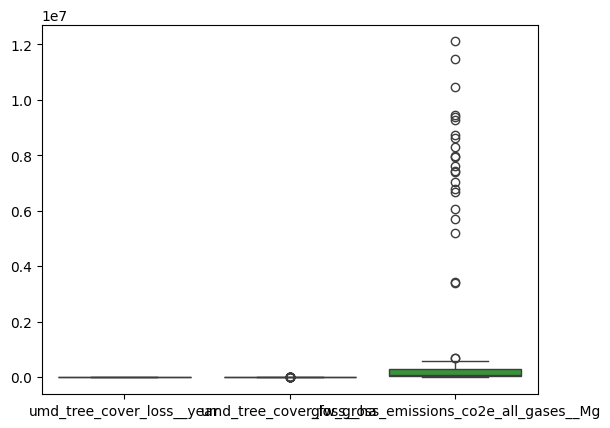

In [ ]:
# Checking for Outliers using Box Plots 
checkOutliersBoxplot(forest_cover_loss)

**Note:** 
- Good News, The data lacks missing values
- However, we find that there exists outliers based on the tree cover loss but based on context of the data there exists a chance of the outliers being true values as opposed to outlier values.

#### Focuses on the Locations of tree cover loss in Kenya
- Kindly note we will merge the adm1_metadata.csv with the treecover_extent_2000_by_region_ha.csv due to the locations

In [ ]:
# contains Kenya County based details
adm1_metadata = readCSV("data/Forest Cover/Location of tree cover loss in Kenya/adm1_metadata.csv")
# contains Forest cover extent and loss per region
forest_cover_extent_by_region = readCSV("data/Forest Cover/Location of tree cover loss in Kenya/treecover_extent_2000_by_region__ha.csv")
forest_cover_loss_by_region =readCSV("data/Forest Cover/Location of tree cover loss in Kenya/treecover_loss_by_region__ha.csv")


In [ ]:
# Merge DataFrames
forest_cover_extent_by_region_merged = pd.merge(forest_cover_extent_by_region, adm1_metadata, left_on='adm1', right_on='adm1__id', how='inner')

# Drop unnecessary columns
unnecessary_columns = ['adm1', 'adm1__id', 'iso']
forest_cover_extent_by_region_merged = forest_cover_extent_by_region_merged.drop(columns=unnecessary_columns)

# Reset index without inplace
forest_cover_extent_by_region_merged.reset_index(drop=True, inplace=True)

In [ ]:
# Viewing the Data
forest_cover_extent_by_region_merged.head()

,umd_tree_cover_extent_2000__ha,area__ha,name
0,113989.000894,1.084248e+06,Baringo
1,120633.520455,2.378441e+05,Bomet
2,71112.041454,3.573152e+05,Bungoma
3,22038.531962,1.799546e+05,Busia
4,107098.334326,2.804070e+05,Elgeyo-Marakwet


#### Focuses on the Primary Forest Loss in Kenya
- Focuses wholly on the tree cover loss per year 

In [ ]:
primary_forests_2001_tropics_only = readCSV("data/Forest Cover/Primary Forest loss in Kenya/treecover_extent_2000_in_primary_forests_2001_tropics_only__ha.csv")
primary_forest_cover_loss_2001_tropics_only = readCSV("data/Forest Cover/Primary Forest loss in Kenya/treecover_extent_2000_in_primary_forests_2001_tropics_only__ha.csv")
primary_forest_cover_loss_ha = readCSV("data/Forest Cover/Primary Forest loss in Kenya/treecover_loss__ha.csv")

In [ ]:
summaryOfData(primary_forests_2001_tropics_only)

Statistical Summary of data
       umd_tree_cover_extent_2000__ha       area__ha
count                        1.000000       1.000000
mean                    649579.402794  650650.989627
std                               NaN            NaN
min                     649579.402794  650650.989627
25%                     649579.402794  650650.989627
50%                     649579.402794  650650.989627
75%                     649579.402794  650650.989627
max                     649579.402794  650650.989627


In [ ]:
summaryOfData(primary_forest_cover_loss_2001_tropics_only)

Statistical Summary of data
       umd_tree_cover_extent_2000__ha       area__ha
count                        1.000000       1.000000
mean                    649579.402794  650650.989627
std                               NaN            NaN
min                     649579.402794  650650.989627
25%                     649579.402794  650650.989627
50%                     649579.402794  650650.989627
75%                     649579.402794  650650.989627
max                     649579.402794  650650.989627


In [ ]:
summaryOfData(primary_forest_cover_loss_ha)

Statistical Summary of data
       umd_tree_cover_loss__year  umd_tree_cover_loss__ha  \
count                  22.000000                22.000000   
mean                 2011.500000             17046.704571   
std                     6.493587              4524.888037   
min                  2001.000000              6639.031072   
25%                  2006.250000             15421.504702   
50%                  2011.500000             17497.941677   
75%                  2016.750000             19180.233260   
max                  2022.000000             26102.960081   

       gfw_gross_emissions_co2e_all_gases__Mg  
count                            2.200000e+01  
mean                             8.375434e+06  
std                              2.381587e+06  
min                              3.695346e+06  
25%                              7.306174e+06  
50%                              8.438305e+06  
75%                              9.715285e+06  
max                              1.296

## 2. GHG Emissions
- County Groupings
- Annual Emissions (1830-2021)
- Emissions Cumulative CO2e (1851-2021)
- GMST_respoonse 

### About Data
**EMISSIONS_ANNUAL_1830-2021.csv**: Data includes **annual emissions of CO2** (Pg CO2 year-1), CH4 (Tg CH4 year-1) and N2O (Tg N2O year-1) during 1830-2021. The Data column provides values for every combination of the categorical variables. 

**EMISSIONS_CUMULATIVE_CO2e100_1851-2021.csv**: Data includes the **cumulative CO2 equivalent emissions** in units Pg CO2-e100 during 1851-2021. The Data column provides values for every combination of the categorical variables. 

**GMST_response_1851-2021.csv**: Data includes the change in **global mean surface temperature** (GMST) due to emissions of the three gases during 1851-2021 in units °C. The Data column provides values for every combination of the categorical variables. 


In [ ]:
# country_groupings = readXLS("data/GHG Emissions/COUNTRY_GROUPINGS.xlsx") # No need to read this as it contains the country codes
annual_emissions = readCSV("data/GHG Emissions/EMISSIONS_ANNUAL_1830-2021.csv")
cumulative_emissions = readCSV("data/GHG Emissions/EMISSIONS_CUMULATIVE_CO2e100_1851-2021.csv")
global_mean_surface_temperature_reponse = readCSV("data/GHG Emissions/GMST_response_1851-2021.csv")

### Overview of into the data
- Overview of Data using df.head()
- Checking Data types
- Checking the dimension of the data

#### Annual Emissions Summary & Describe

In [ ]:
summaryOfData(annual_emissions)

Statistical Summary of data
                Year           Data
count  369048.000000  368280.000000
mean     1926.478734       0.733928
std        54.967060       6.863213
min      1830.000000      -0.401257
25%      1879.000000       0.000124
50%      1927.000000       0.003339
75%      1974.000000       0.043417
max      2021.000000     364.929660


In [ ]:
describeData(annual_emissions)

--------------------
 OVERVIEW OF DATA 
--------------------
     CNTR_NAME ISO3    Gas Component  Year      Data              Unit
0  Afghanistan  AFG  CH[4]    Fossil  1830  0.018746  Tg~CH[4]~year^-1
1  Afghanistan  AFG  CH[4]    Fossil  1831  0.018850  Tg~CH[4]~year^-1
2  Afghanistan  AFG  CH[4]    Fossil  1832  0.018953  Tg~CH[4]~year^-1
3  Afghanistan  AFG  CH[4]    Fossil  1833  0.019057  Tg~CH[4]~year^-1
4  Afghanistan  AFG  CH[4]    Fossil  1834  0.019161  Tg~CH[4]~year^-1
--------------------
 DATA TYPES 
--------------------
CNTR_NAME     object
ISO3          object
Gas           object
Component     object
Year           int64
Data         float64
Unit          object
dtype: object
--------------------
 DATAFRAME SHAPE 
--------------------
(369048, 7)


#### Cumulative Emissions Summary & Describe

In [ ]:
summaryOfData(cumulative_emissions)

Statistical Summary of data
                Year           Data
count  450585.000000  450585.000000
mean     1936.000000       7.251899
std        49.362659      62.541571
min      1851.000000      -2.800884
25%      1893.000000       0.001642
50%      1936.000000       0.040730
75%      1979.000000       0.529036
max      2021.000000    3576.508126


In [ ]:
describeData(cumulative_emissions)

--------------------
 OVERVIEW OF DATA 
--------------------
     CNTR_NAME ISO3    Gas Component  Year      Data              Unit
0  Afghanistan  AFG  3-GHG    Fossil  1851  0.000455  Pg~CO[2]*-e[100]
1  Afghanistan  AFG  3-GHG    Fossil  1852  0.000913  Pg~CO[2]*-e[100]
2  Afghanistan  AFG  3-GHG    Fossil  1853  0.001375  Pg~CO[2]*-e[100]
3  Afghanistan  AFG  3-GHG    Fossil  1854  0.001841  Pg~CO[2]*-e[100]
4  Afghanistan  AFG  3-GHG    Fossil  1855  0.002311  Pg~CO[2]*-e[100]
--------------------
 DATA TYPES 
--------------------
CNTR_NAME     object
ISO3          object
Gas           object
Component     object
Year           int64
Data         float64
Unit          object
dtype: object
--------------------
 DATAFRAME SHAPE 
--------------------
(450585, 7)


#### Global Mean Surface Temperature Response Summary & Describe

In [ ]:
summaryOfData(global_mean_surface_temperature_reponse)

Statistical Summary of data
                Year          Data
count  450585.000000  4.505850e+05
mean     1936.000000  3.265729e-03
std        49.362659  2.816419e-02
min      1851.000000 -1.261315e-03
25%      1893.000000  7.393887e-07
50%      1936.000000  1.834198e-05
75%      1979.000000  2.382394e-04
max      2021.000000  1.610600e+00


In [ ]:
describeData(global_mean_surface_temperature_reponse)

--------------------
 OVERVIEW OF DATA 
--------------------
     CNTR_NAME ISO3    Gas Component  Year          Data Unit
0  Afghanistan  AFG  3-GHG    Fossil  1851  2.047658e-07   °C
1  Afghanistan  AFG  3-GHG    Fossil  1852  4.112079e-07   °C
2  Afghanistan  AFG  3-GHG    Fossil  1853  6.193339e-07   °C
3  Afghanistan  AFG  3-GHG    Fossil  1854  8.291519e-07   °C
4  Afghanistan  AFG  3-GHG    Fossil  1855  1.040669e-06   °C
--------------------
 DATA TYPES 
--------------------
CNTR_NAME     object
ISO3          object
Gas           object
Component     object
Year           int64
Data         float64
Unit          object
dtype: object
--------------------
 DATAFRAME SHAPE 
--------------------
(450585, 7)


### Check forr Null and Outliers
- Check Summary of the data in terms of null values
- Checking for Outliers using IQR (Inter Quartile Range) and Box Plots for visualization
    - **Formulaes**
    - IQR = Quartile3 – Quartile1
    - upperBound = Q3 + 1.5*IQR
    - lowerBound = Q1 – 1.5*IQR

In [ ]:
# checking missing values 
checkNullValues(annual_emissions)  

Null Values Present in Data
CNTR_NAME    0.000000
ISO3         0.000000
Gas          0.000000
Component    0.000000
Year         0.000000
Data         0.208103
Unit         0.000000
dtype: float64


In [ ]:
# checking missing values  
checkNullValues(cumulative_emissions)  

Null Values Present in Data
CNTR_NAME    0.0
ISO3         0.0
Gas          0.0
Component    0.0
Year         0.0
Data         0.0
Unit         0.0
dtype: float64


In [ ]:
# checking missing values  
checkNullValues(global_mean_surface_temperature_reponse)  

Null Values Present in Data
CNTR_NAME    0.0
ISO3         0.0
Gas          0.0
Component    0.0
Year         0.0
Data         0.0
Unit         0.0
dtype: float64


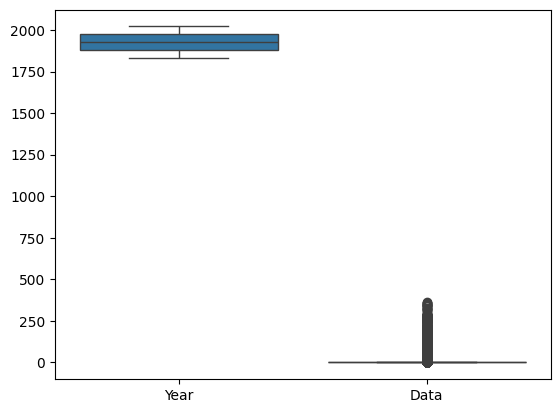

In [ ]:
# Checking for Outliers using Box Plots 
checkOutliersBoxplot(annual_emissions)

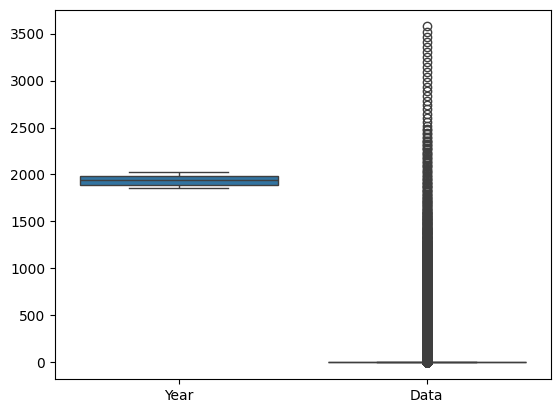

In [ ]:
# Checking for Outliers using Box Plots 
checkOutliersBoxplot(cumulative_emissions)

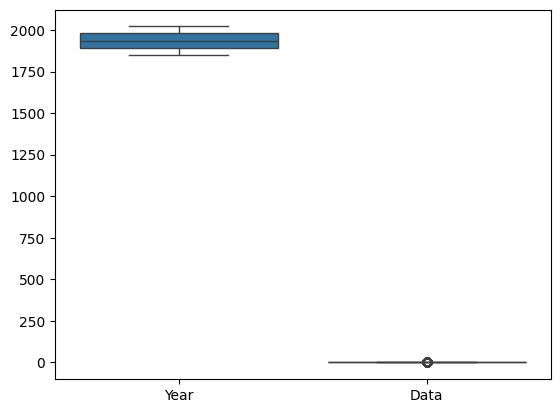

In [ ]:
# Checking for Outliers using Box Plots 
checkOutliersBoxplot(global_mean_surface_temperature_reponse)

# Visualizations

- Forest Cover Loss in Kenya
- GHG Emissions in Kenya


# Modeling 

In [112]:
# Define linear regression model
model = LinearRegression()

# Defining hyperparameters to optimize
param_grid = {
    'alpha': [0.1, 0.01, 0.001],  # Regularization parameter
    'normalize': [True, False],    # Whether to normalize the features
    'fit_intercept': [True, False] # Whether to fit an intercept
}

# Extraction